In [11]:
### IMPORTS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb


plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [124]:
data = pd.read_csv('used_cars.csv')

In [21]:
data.shape

(5055, 8)

In [125]:
data.head()

,name,year,selling_price,km_driven,fuel_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


<AxesSubplot:>

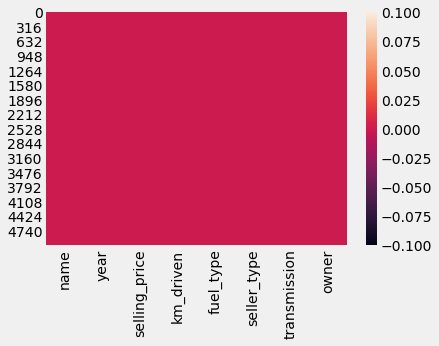

In [23]:
sb.heatmap(data.isnull())

In [24]:
data.describe()

,year,selling_price,km_driven
count,5055.000000,5.055000e+03,5055.000000
mean,2013.230069,5.338492e+05,66044.312166
std,4.185911,6.531567e+05,46329.687167
min,1983.000000,2.000000e+04,1.000000
25%,2011.000000,2.200000e+05,35000.000000
50%,2014.000000,3.750000e+05,60000.000000
75%,2017.000000,6.170000e+05,90000.000000
max,2020.000000,1.000000e+07,806599.000000


### VISUALIZATION

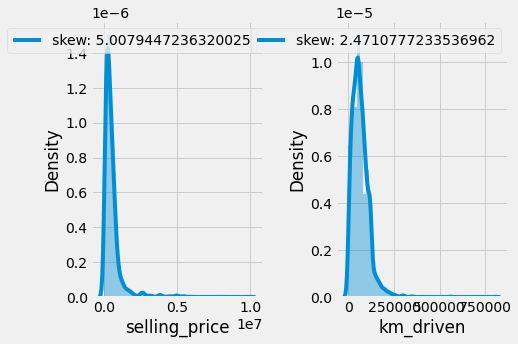

In [37]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
sb.distplot(data['selling_price'])
plt.legend(['skew: '+str(data['selling_price'].skew())])


plt.subplot(1,2,2)
sb.distplot(data['km_driven'])
plt.legend(['skew: '+str(data['km_driven'].skew())])

plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1983'),
  Text(1, 0, '1992'),
  Text(2, 0, '1995'),
  Text(3, 0, '1996'),
  Text(4, 0, '1997'),
  Text(5, 0, '1998'),
  Text(6, 0, '1999'),
  Text(7, 0, '2000'),
  Text(8, 0, '2001'),
  Text(9, 0, '2002'),
  Text(10, 0, '2003'),
  Text(11, 0, '2004'),
  Text(12, 0, '2005'),
  Text(13, 0, '2006'),
  Text(14, 0, '2007'),
  Text(15, 0, '2008'),
  Text(16, 0, '2009'),
  Text(17, 0, '2010'),
  Text(18, 0, '2011'),
  Text(19, 0, '2012'),
  Text(20, 0, '2013'),
  Text(21, 0, '2014'),
  Text(22, 0, '2015'),
  Text(23, 0, '2016'),
  Text(24, 0, '2017'),
  Text(25, 0, '2018'),
  Text(26, 0, '2019'),
  Text(27, 0, '2020')])

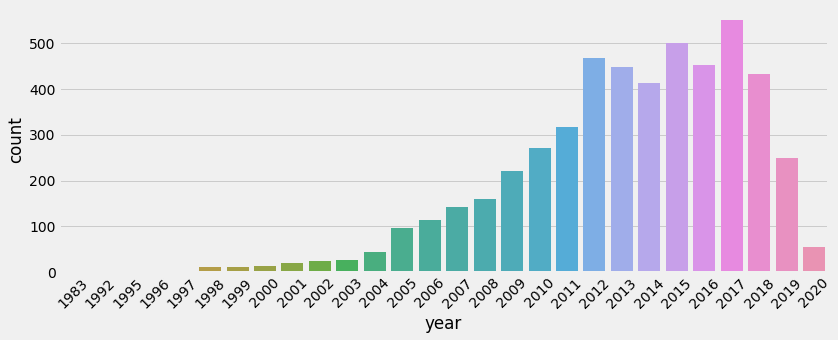

In [42]:
plt.figure(figsize=(27,10))
plt.subplot(2,2,1)
sb.countplot(data['year'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Datsun'),
  Text(3, 0, 'Honda'),
  Text(4, 0, 'Tata'),
  Text(5, 0, 'Chevrolet'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Jaguar'),
  Text(8, 0, 'Mercedes-Benz'),
  Text(9, 0, 'Audi'),
  Text(10, 0, 'Skoda'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'BMW'),
  Text(13, 0, 'Mahindra'),
  Text(14, 0, 'Ford'),
  Text(15, 0, 'Nissan'),
  Text(16, 0, 'Renault'),
  Text(17, 0, 'Fiat'),
  Text(18, 0, 'Volkswagen'),
  Text(19, 0, 'Volvo'),
  Text(20, 0, 'Mitsubishi'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'Daewoo'),
  Text(23, 0, 'MG'),
  Text(24, 0, 'Force'),
  Text(25, 0, 'Isuzu'),
  Text(26, 0, 'OpelCorsa'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Kia'),
  Text(29, 0, 'Lexus')])

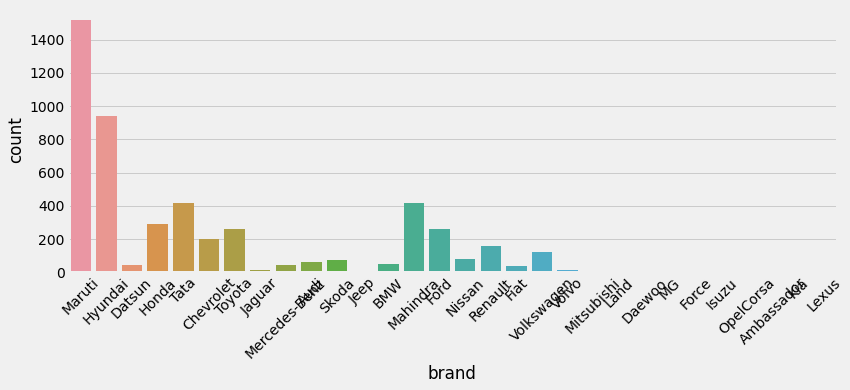

In [126]:
data['brand'] = data['name'].apply(lambda x : x.split()[0])

plt.figure(figsize=(27,10))
plt.subplot(2,2,1)
sb.countplot(data['brand'])
plt.xticks(rotation=45)

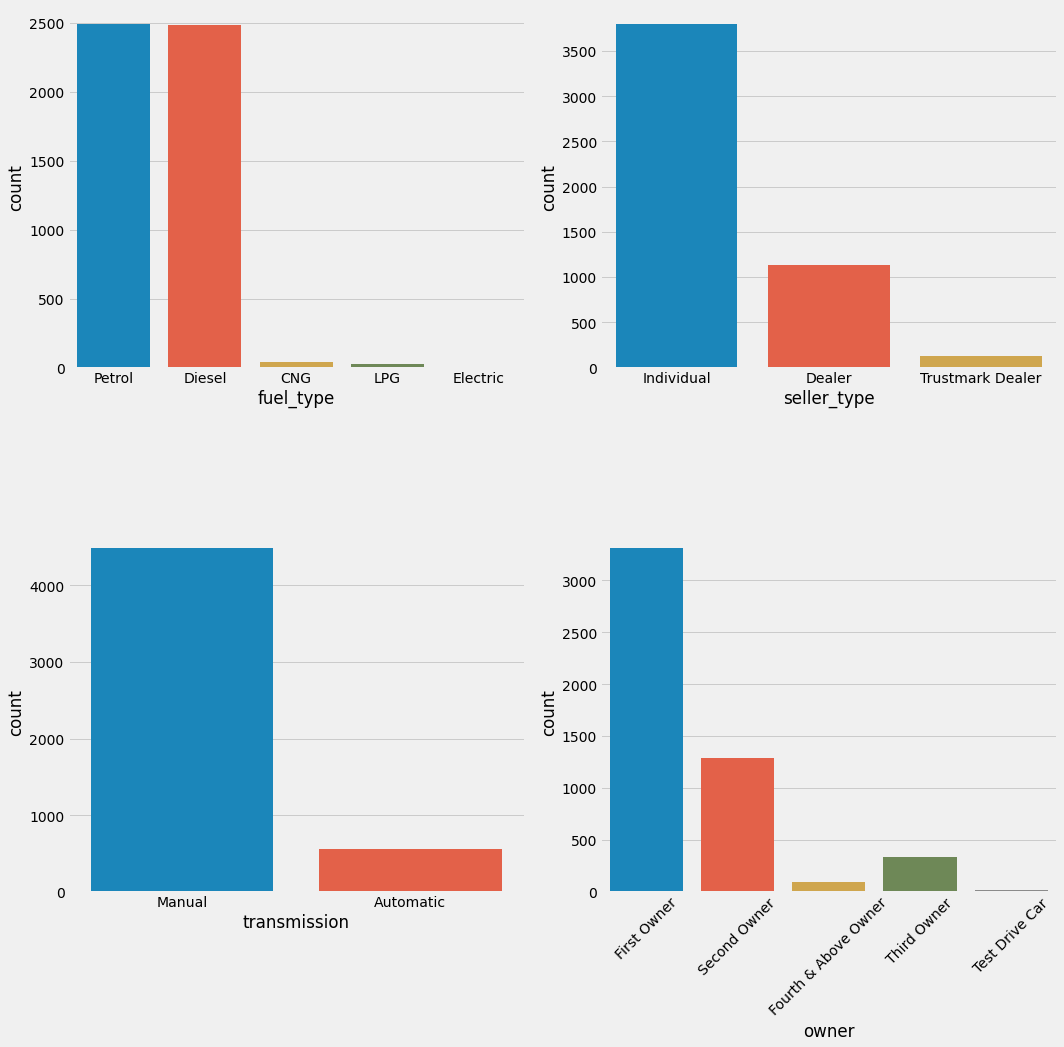

In [56]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sb.countplot(data['fuel_type'])


plt.subplot(3,2,2)
sb.countplot(data['seller_type'])

plt.subplot(3,2,3)
sb.countplot(data['transmission'])


plt.subplot(3,2,4)
sb.countplot(data['owner'])
plt.xticks(rotation=45)

plt.tight_layout()

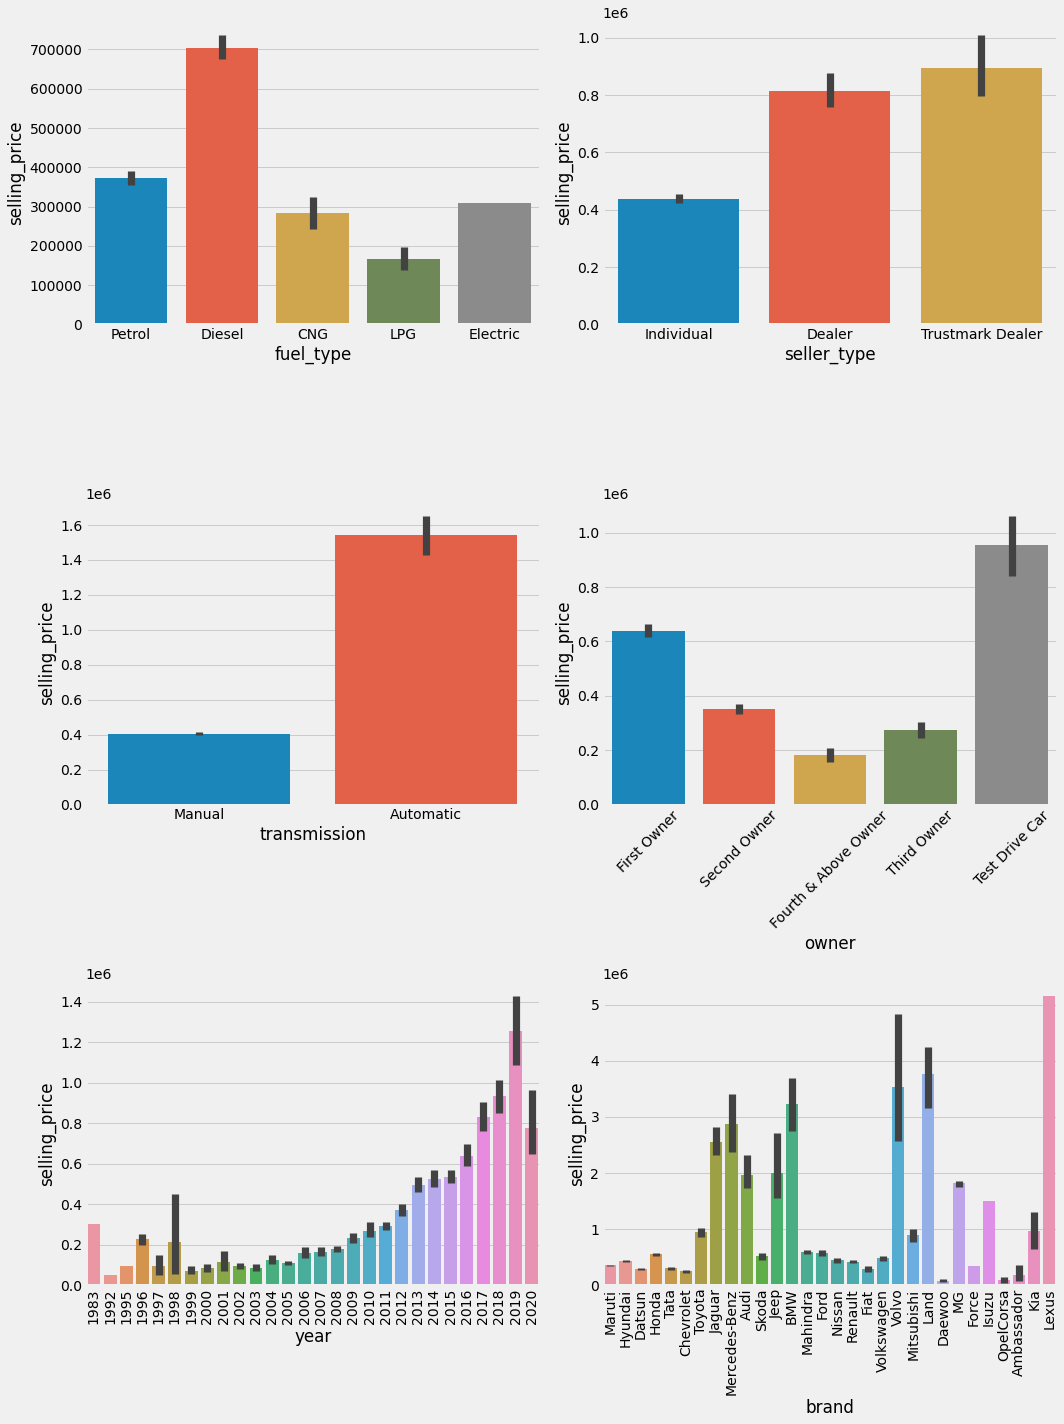

In [60]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sb.barplot(data['fuel_type'],data['selling_price'])


plt.subplot(3,2,2)
sb.barplot(data['seller_type'],data['selling_price'])

plt.subplot(3,2,3)
sb.barplot(data['transmission'],data['selling_price'])


plt.subplot(3,2,4)
sb.barplot(data['owner'],data['selling_price'])
plt.xticks(rotation=45)


plt.subplot(3,2,5)
sb.barplot(data['year'],data['selling_price'])
plt.xticks(rotation=90)

plt.subplot(3,2,6)
sb.barplot(data['brand'],data['selling_price'])
plt.xticks(rotation=90)

plt.tight_layout()

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

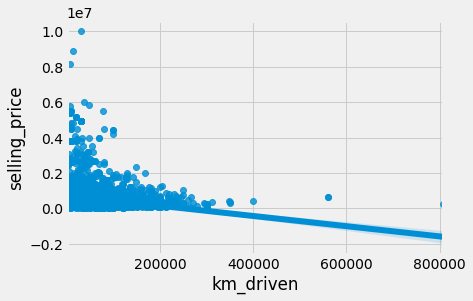

In [62]:
sb.regplot(data['km_driven'],data['selling_price'])

In [ ]:
sb.regplot(data['km_driven'],data['selling_price'])

In [127]:
data.drop('name',axis=1,inplace=True)

In [128]:
data.dtypes

year              int64
selling_price     int64
km_driven         int64
fuel_type        object
seller_type      object
transmission     object
owner            object
brand            object
dtype: object

In [129]:
data['year'] = data['year'].apply(lambda x: str(x))

In [130]:
from sklearn.preprocessing import LabelEncoder,PowerTransformer

In [131]:
labelEncoder = LabelEncoder()
for i in data.columns:
    if(data[i].dtype=='object'):
        data[i] = labelEncoder.fit_transform(data[i])

In [132]:
data.head()

,year,selling_price,km_driven,fuel_type,seller_type,transmission,owner,brand
0,14,60000,70000,4,1,1,0,19
1,14,135000,50000,4,1,1,0,19
2,19,600000,100000,1,1,1,0,10
3,24,250000,46000,4,1,1,0,5
4,21,450000,141000,1,1,1,2,9


In [109]:
from scipy.stats import zscore

<AxesSubplot:xlabel='selling_price'>

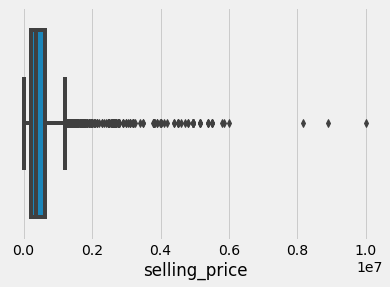

In [111]:
sb.boxplot(data['selling_price'])

<AxesSubplot:xlabel='km_driven'>

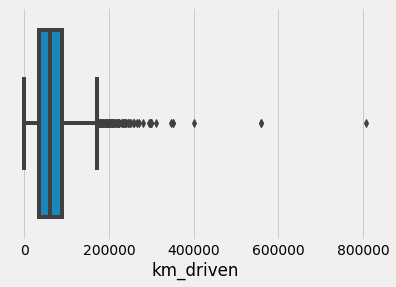

In [112]:
sb.boxplot(data['km_driven'])

In [133]:
zscores = np.abs(zscore(data))

In [134]:
len(np.where(zscores>3)[0])

232

In [135]:
data_new = data[(zscores<3).all(axis=1)]


In [136]:
data_new[['selling_price','km_driven']].skew()

selling_price    1.856948
km_driven        0.717055
dtype: float64

In [137]:
data['selling_price']=PowerTransformer().fit_transform(data[['selling_price']])
data['km_driven']=PowerTransformer().fit_transform(data[['km_driven']])


In [171]:
data.head()

,year,selling_price,km_driven,fuel_type,seller_type,transmission,owner,brand
0,14,-2.192728,0.287919,4,1,1,0,19
1,14,-1.175283,-0.176175,4,1,1,0,19
2,19,0.604331,0.857318,1,1,1,0,10
3,24,-0.426007,-0.281360,4,1,1,0,5
4,21,0.270113,1.493015,1,1,1,2,9


In [139]:
x = data.drop('selling_price',1)
y = data['selling_price']

<AxesSubplot:>

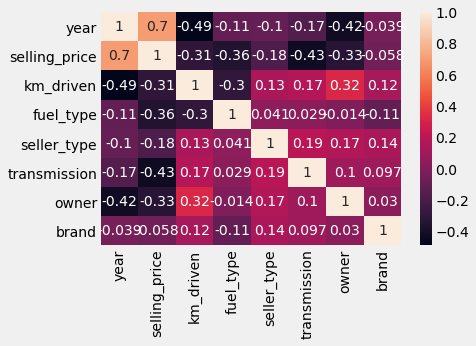

In [146]:
sb.heatmap(data.corr(),annot=True)

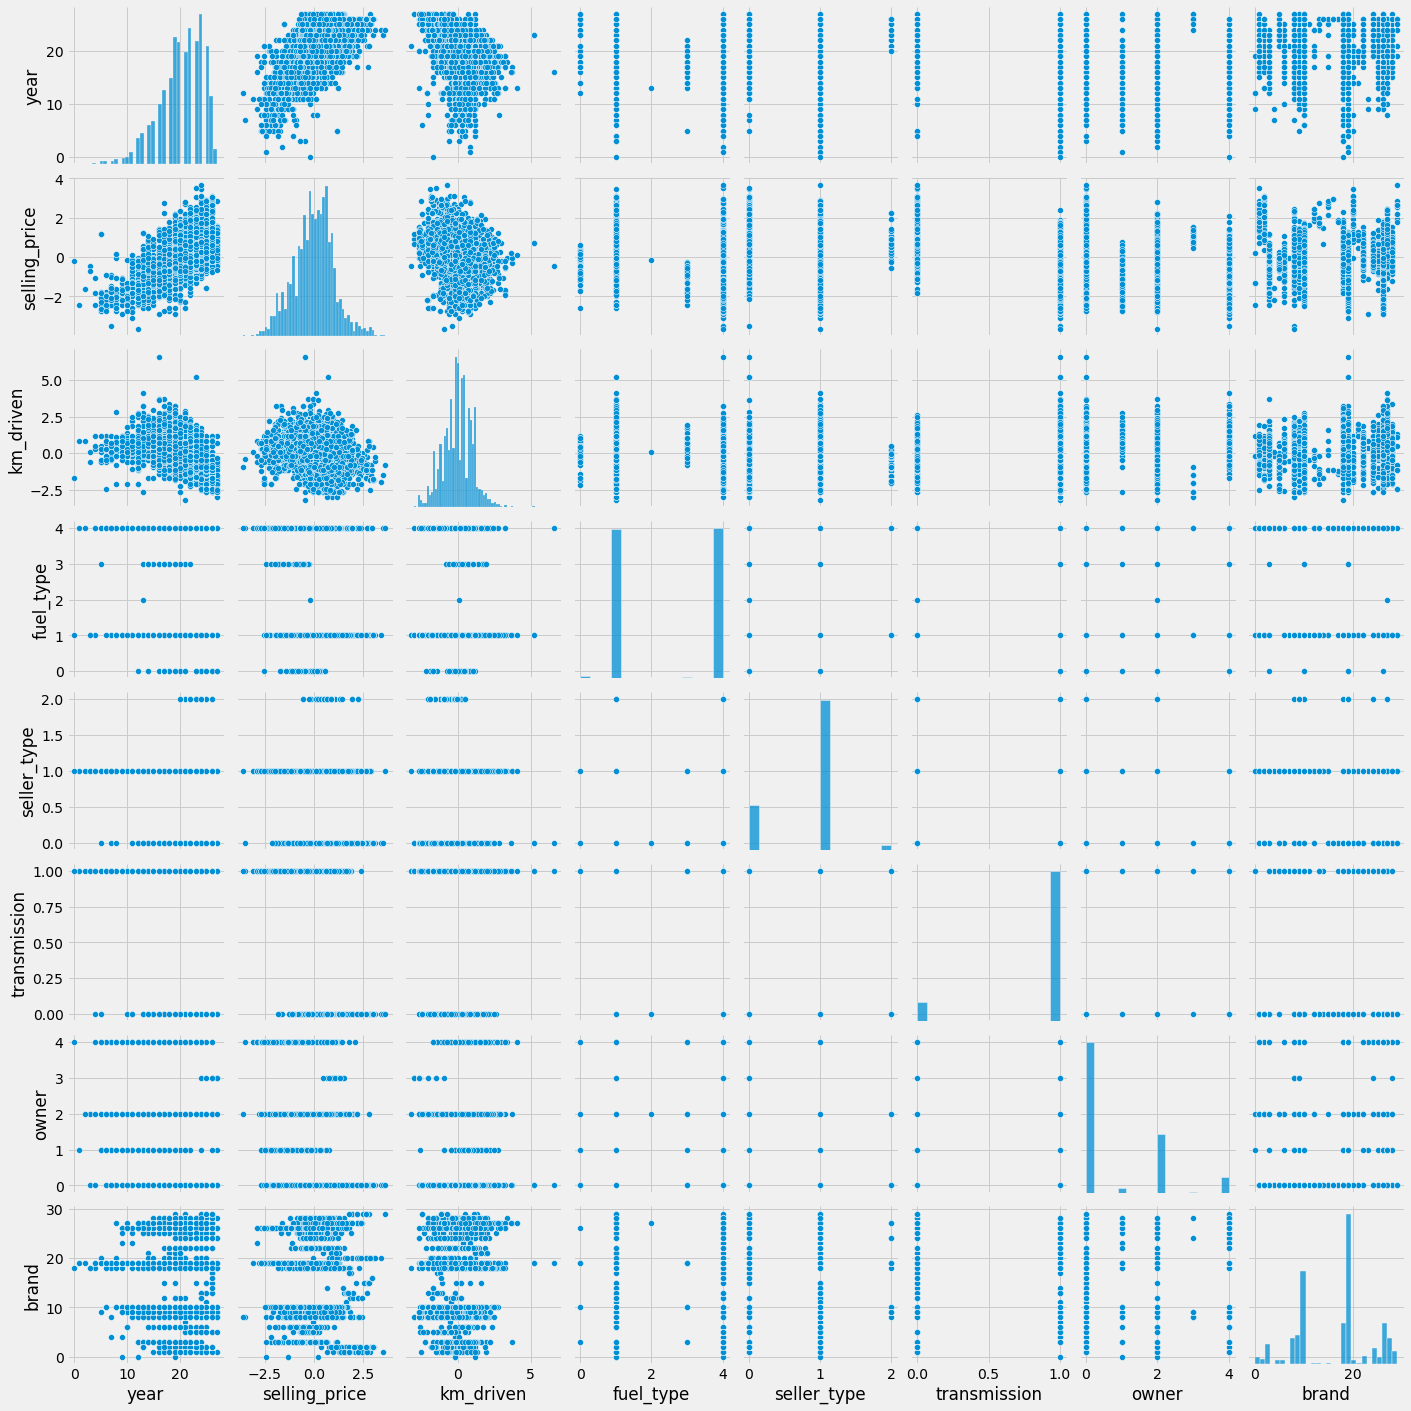

In [147]:
sb.pairplot(data)

In [148]:
from sklearn.decomposition import PCA

In [149]:
 pca = PCA()

In [150]:
pca.fit(x,y)

PCA()

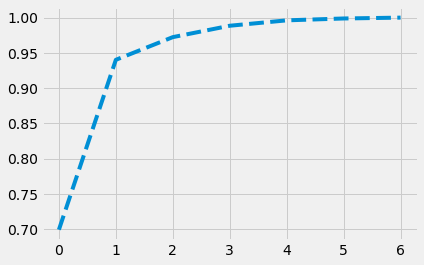

In [151]:
cumsum= np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum,'--')

In [160]:
#function to find best random state for any model
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lr=LGBMRegressor()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu," on Random_state",maxRS)


Best accuracy is  0.8403938726078586  on Random_state 30


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=maxRS)

In [181]:
# Method to for algorithm prediction for any model.

def model_predict(model):
   
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='r2'))
     
    print('------------',model,'--------------')
    print(' R2 Score              : ', r2_score(y_test,predictions))
    print('Training Score : ',cv_score)
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Absolute Mean Square   :', mean_absolute_error(y_test,predictions))
    

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sb.regplot(y_test,predictions,color='orange')
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    
    
    plt.subplot(1,2,2)
    sb.distplot(predictions-y_test)
    plt.xlabel('error')
 

------------ LinearRegression() --------------
 R2 Score              :  0.691030421564027
Training Score :  0.6703118437481821
Root Mean Squared Error : 0.5665452545617261
Absolute Mean Square   : 0.4359776932589529


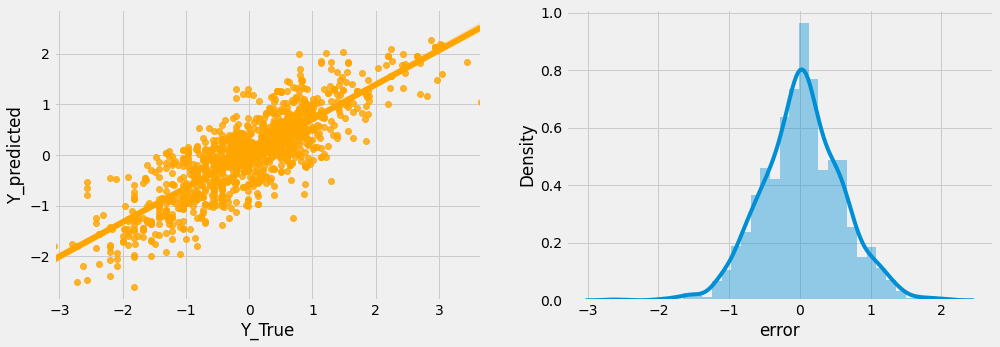

In [182]:
model_predict(LinearRegression())

------------ Ridge() --------------
 R2 Score              :  0.6909953588068711
Training Score :  0.6703117322372304
Root Mean Squared Error : 0.5665774002429239
Absolute Mean Square   : 0.4359850619286405


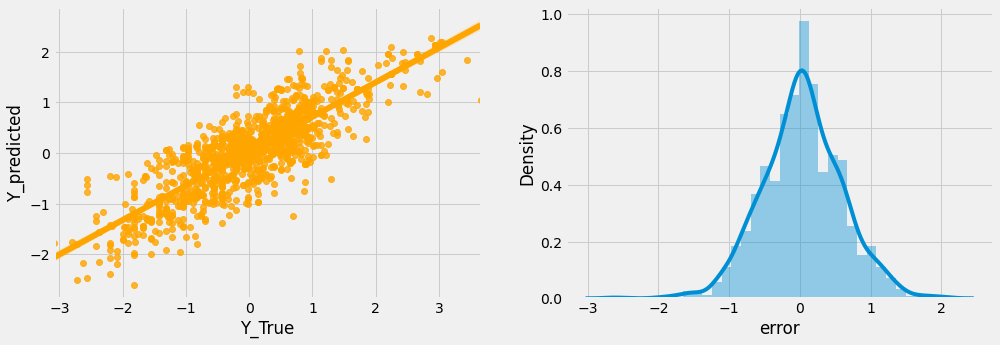

In [183]:
model_predict(Ridge())

------------ Lasso() --------------
 R2 Score              :  0.43658498542273827
Training Score :  0.42558165133035325
Root Mean Squared Error : 0.765051999014854
Absolute Mean Square   : 0.5828866055471145


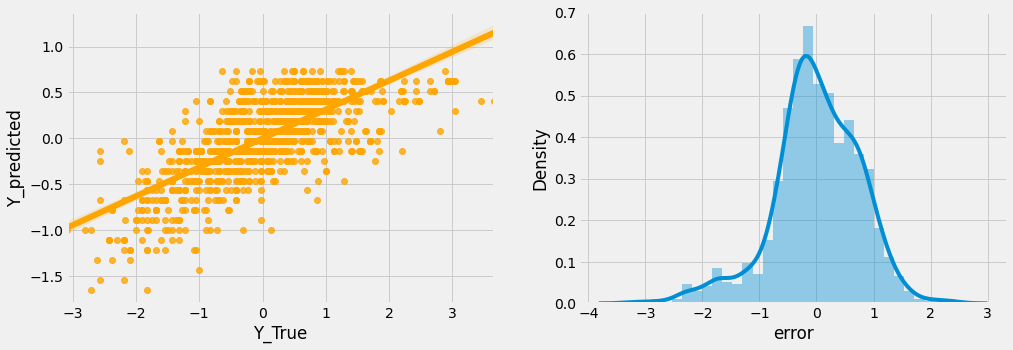

In [184]:
model_predict(Lasso())

------------ RandomForestRegressor() --------------
 R2 Score              :  0.8215059319004374
Training Score :  0.7798196987574338
Root Mean Squared Error : 0.43061449036711386
Absolute Mean Square   : 0.31171799542509127


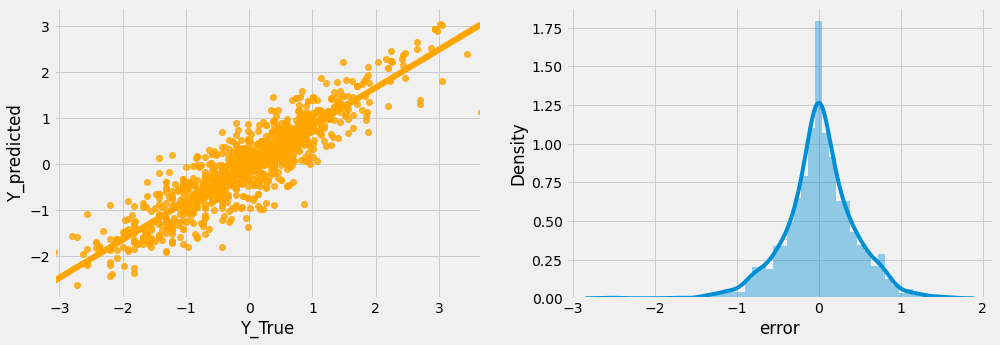

In [185]:
model_predict(RandomForestRegressor())

------------ LGBMRegressor() --------------
 R2 Score              :  0.8403938726078586
Training Score :  0.8019922794522489
Root Mean Squared Error : 0.40719414636459267
Absolute Mean Square   : 0.31354229912384807


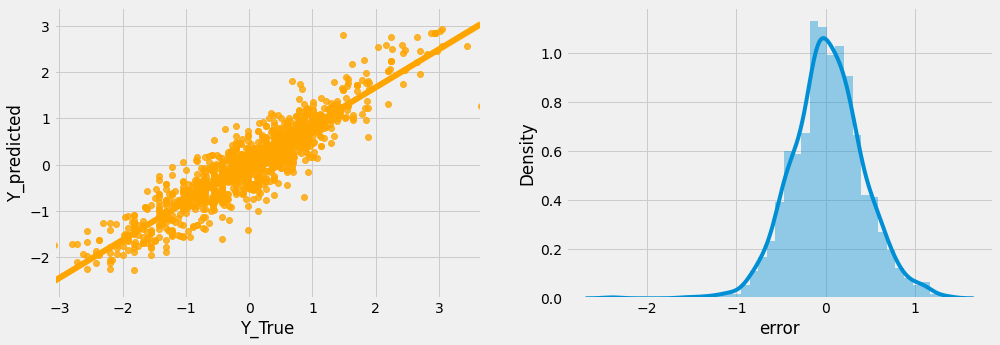

In [186]:
model_predict(LGBMRegressor())

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.8486108047577936
Training Score :  0.7984319326068714
Root Mean Squared Error : 0.39657395291829506
Absolute Mean Square   : 0.29818467581173586


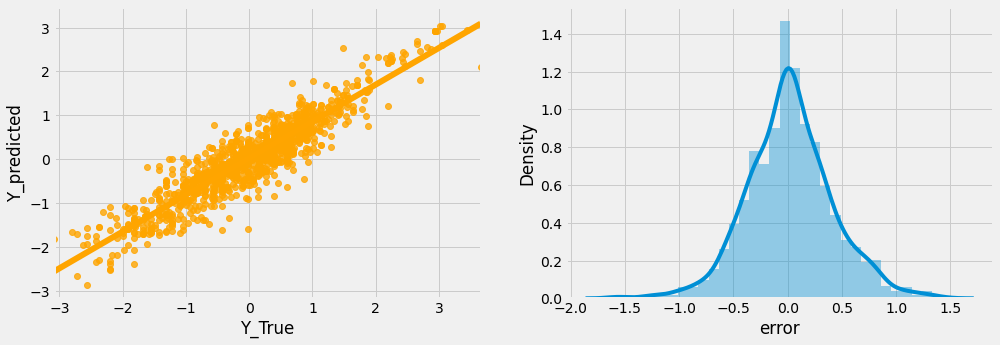

In [187]:
model_predict(XGBRegressor())

------------ SVR() --------------
 R2 Score              :  0.6694780395307389
Training Score :  0.6452016979440692
Root Mean Squared Error : 0.5859720564568399
Absolute Mean Square   : 0.44167034838614655


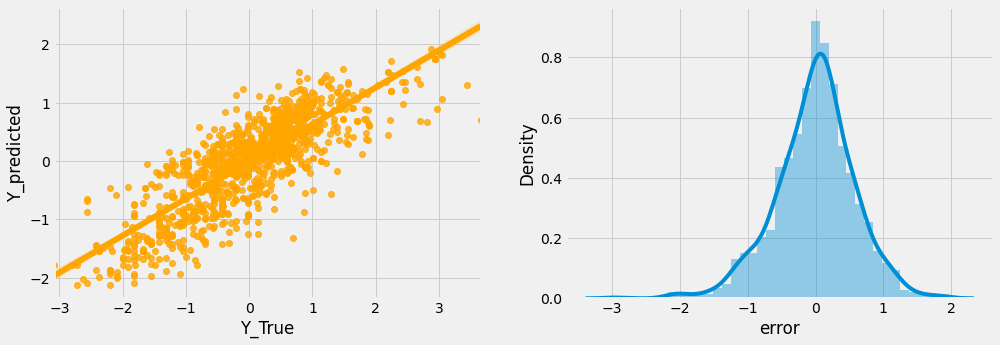

In [188]:
model_predict(SVR())

# HYPERTUNING XGB MODEL

In [197]:
params_xgb = {
    'gamma': [0,0.1,0.01,1,2,1.5],
    'n_estimators': [10,50,100,70,120,150,200],
    'max_depth': [2,3,5,6,4],
    'min_child_weight': [0,0.5,1,.8,2,5,10], 
     'subsample': [0.75,.6,.5,.8,.85,.7],
    'max_leaves': [0,10,20,40,50]
}
xgb = XGBRegressor()

grid_x= RandomizedSearchCV(xgb,params_xgb,cv=5,scoring='r2',n_iter=20,verbose=2)


In [198]:
grid_x.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END gamma=0.01, max_depth=2, max_leaves=20, min_child_weight=0, n_estimators=150, subsample=0.75; total time=   0.2s
[CV] END gamma=0.01, max_depth=2, max_leaves=20, min_child_weight=0, n_estimators=150, subsample=0.75; total time=   0.0s
[CV] END gamma=0.01, max_depth=2, max_leaves=20, min_child_weight=0, n_estimators=150, subsample=0.75; total time=   0.0s
[CV] END gamma=0.01, max_depth=2, max_leaves=20, min_child_weight=0, n_estimators=150, subsample=0.75; total time=   0.0s
[CV] END gamma=0.01, max_depth=2, max_leaves=20, min_child_weight=0, n_estimators=150, subsample=0.75; total time=   0.0s
[CV] END gamma=0.1, max_depth=6, max_leaves=20, min_child_weight=2, n_estimators=10, subsample=0.7; total time=   0.0s
[CV] END gamma=0.1, max_depth=6, max_leaves=20, min_child_weight=2, n_estimators=10, subsample=0.7; total time=   0.0s
[CV] END gamma=0.1, max_depth=6, max_leaves=20, min_child_weight=2, n_estimators=10, subsa

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [200]:
grid_x.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             max_leaves=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None)

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             max_leaves=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.8435289865018802
Training Score :  0.8035695168808648
Root Mean Squared Error : 0.40317509211917346
Absolute Mean Square   : 0.306805693795838


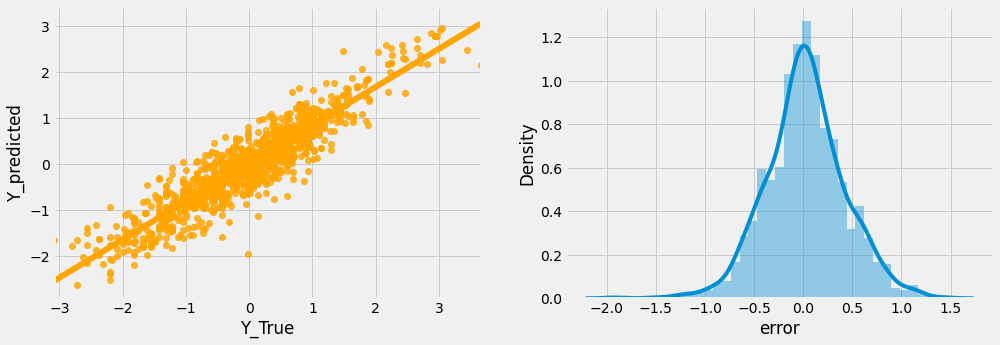

In [202]:
model_predict(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             max_leaves=20, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=120, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None))

In [205]:

    model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             max_leaves=20, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=120, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None)
    
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='r2'))
     
    print('------------',model,'--------------\n\n\n\n')
    print(' R2 Score              : ', r2_score(y_test,predictions))
    print('Training Score : ',cv_score)
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Absolute Mean Square   :', mean_absolute_error(y_test,predictions))
    
 

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             max_leaves=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None) --------------




 R2 Score              :  0.8435289865018802
Training Score :  0.8035695168808648
Root Mean Squared Error : 0.40317509211917346
Absolute Mean Square   : 0.306805693795838


Text(0.5, 0, 'error')

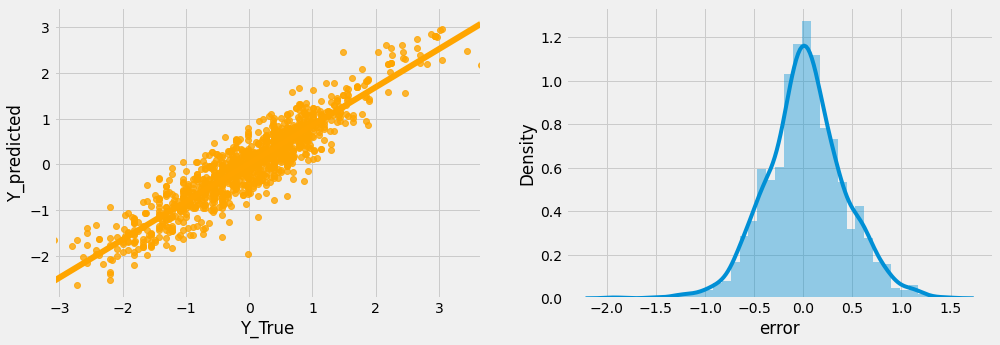

In [206]:

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sb.regplot(y_test,predictions,color='orange')
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    
    
    plt.subplot(1,2,2)
    sb.distplot(predictions-y_test)
    plt.xlabel('error')

In [207]:
import joblib

In [208]:
joblib.dump(model,'model.pk1')

['model.pk1']

In [209]:
joblib.load('model.pk1')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             max_leaves=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=120, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None)